In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This DataSet the details of coustomer in which both numerical and coegorial data are present. Here 'churn' is target variable  which contains 2 catogeries so it will be "Classsification Problem" where we need to predic several churn using classification model.

# Exploratory Data Analysis

In [ ]:
df.shape

(7043, 21)

This data set contains 7043 raw and 21 columns in which 1 is target variable and other is independent variable

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.loc[df['TotalCharges']== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
np.mean(df["TotalCharges"])

2283.3004408418656

In [ ]:
df["TotalCharges"].fillna(np.mean(df["TotalCharges"]),inplace=True)

In [ ]:
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

In [ ]:
cat = []
for i in df.dtypes.index:
  if df.dtypes[i]== 'object':
    cat.append(i)

print(cat)

num = []
for i in df.dtypes.index:
  if df.dtypes[i] != 'object':
    num.append(i)

print(num)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
df.drop('customerID',axis = 1, inplace = True)

In [ ]:
df.nunique().to_frame("Unique")

,Unique
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


# Description Of Dataset

In [ ]:
#statestical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


75% and max have huge diffrence meanse outlier is present

mean < meadian(50%) =  left skwed ::  monthlycharges

mean > meadin (50%) = right skewed :: tenure, seniorcitizen , Totalcharges  

# **Data Visulisation **

Univariate analysis

Churn
No     5174
Yes    1869
Name: count, dtype: int64


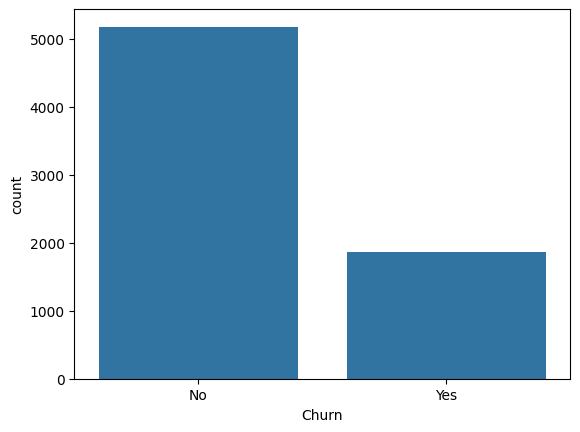

In [ ]:
ax = sns.countplot(x = 'Churn', data = df)
print(df['Churn'].value_counts())

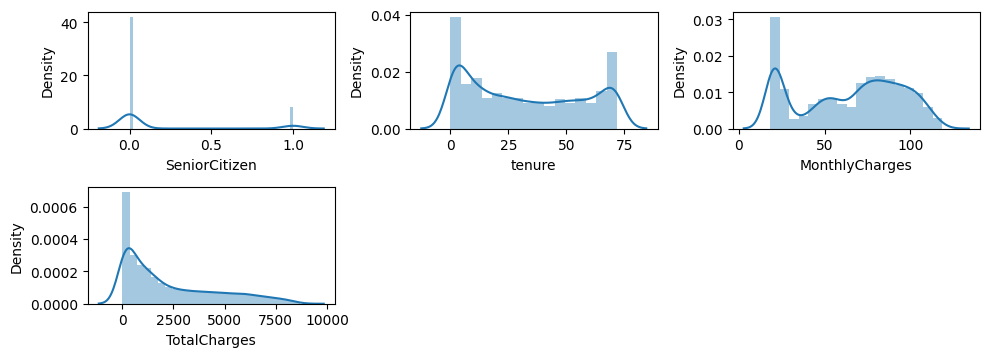

In [ ]:
plt.figure(figsize=(10,5), facecolor='white')
plotnumber = 1
for col in num:
  if plotnumber <=8:
    plt.subplot(3,3,plotnumber)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.yticks(rotation=0)

  plotnumber +=1

plt.tight_layout()

from above dist plot we can conclude tha totalcharges and senior citizen are skew toward left

<function matplotlib.pyplot.show(close=None, block=None)>

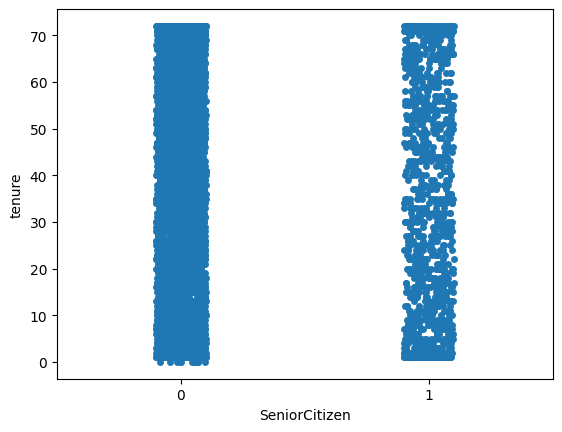

In [ ]:
sns.stripplot(x='SeniorCitizen', y='tenure',data=df)
plt.show

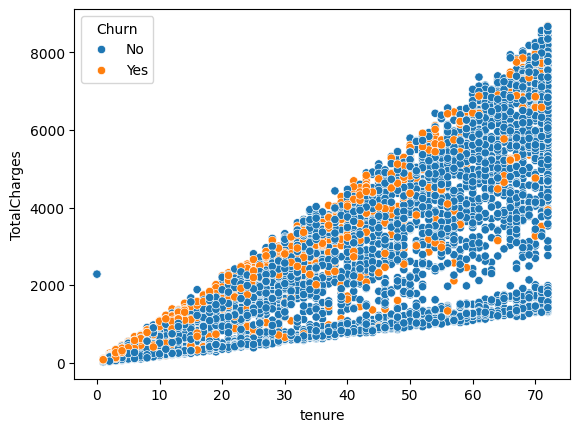

In [ ]:
sns.scatterplot(x='tenure',y = 'TotalCharges',data=df, hue='Churn')
plt.show()

we can see strong linear relation between features
as tenure increases total charges also increases
if coustomer have low churn there is high chance of Churn(target variable)

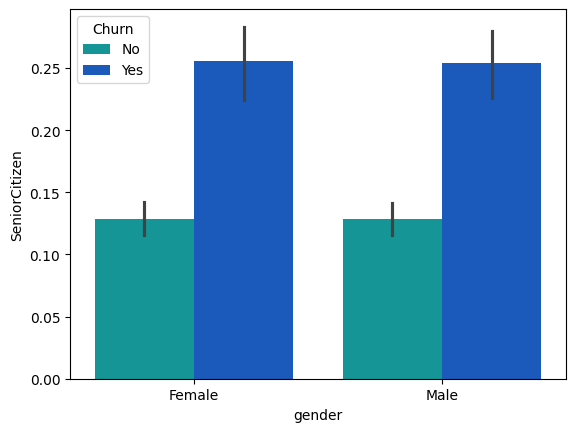

In [ ]:
sns.barplot(x='gender',y='SeniorCitizen',data=df, hue='Churn', palette = 'winter_r')
plt.show()

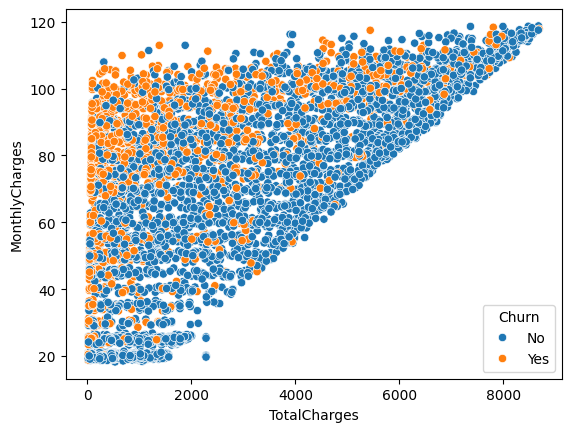

In [ ]:
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',data=df, hue ='Churn')
plt.show()

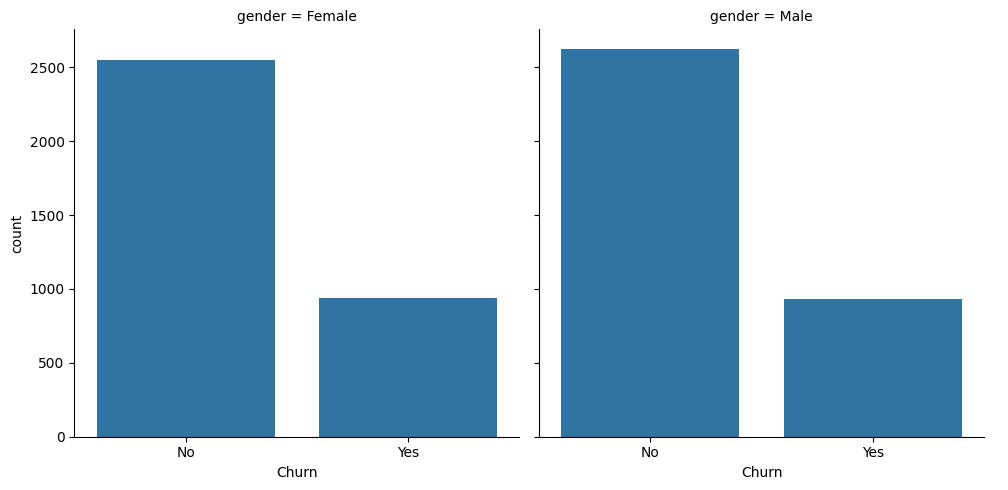

In [ ]:
sns.catplot(x='Churn',col= 'gender',kind='count',data=df)

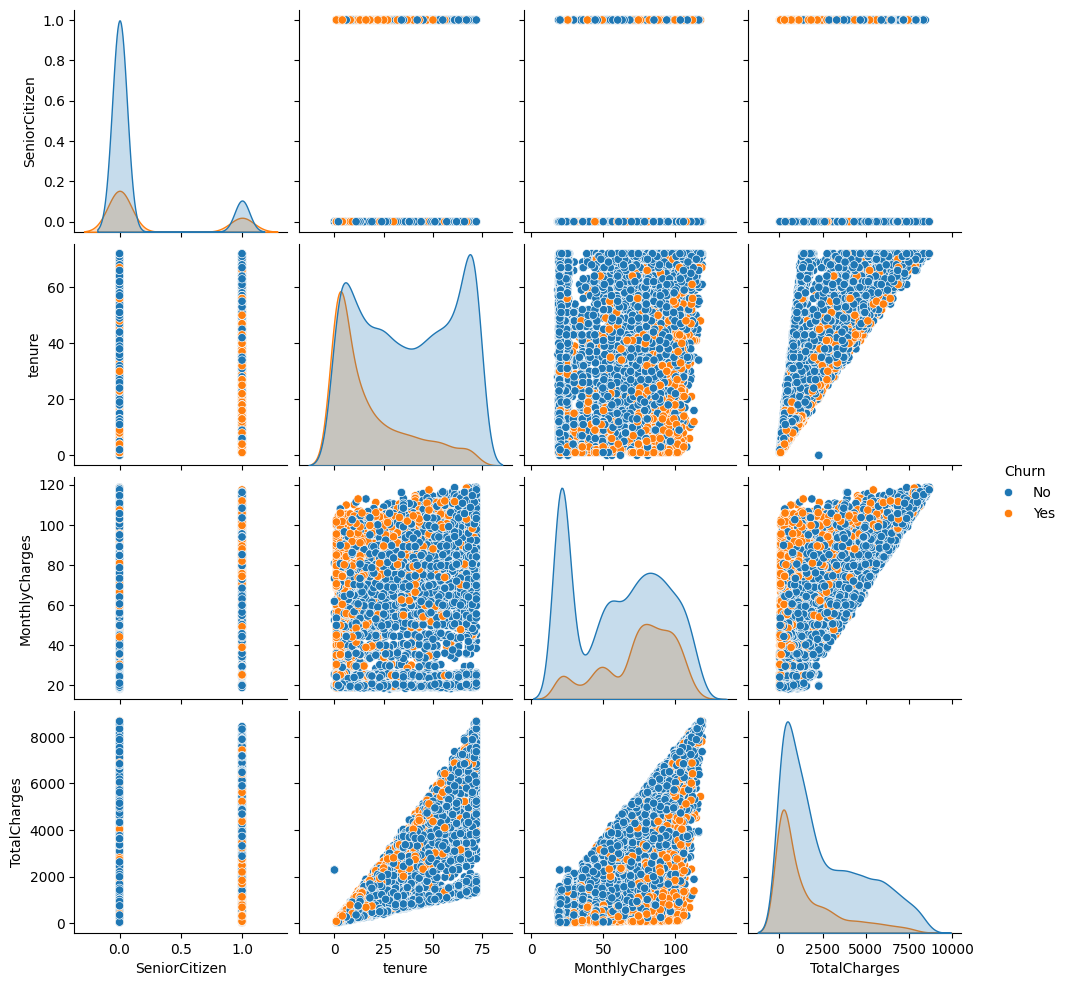

In [ ]:
sns.pairplot(df,hue='Churn')
plt.show()

1. Pairplot gives pairwise relationship between feature and target'Churn'., digonal plot shows distribusion plot

2. we can also check linear relation with each other


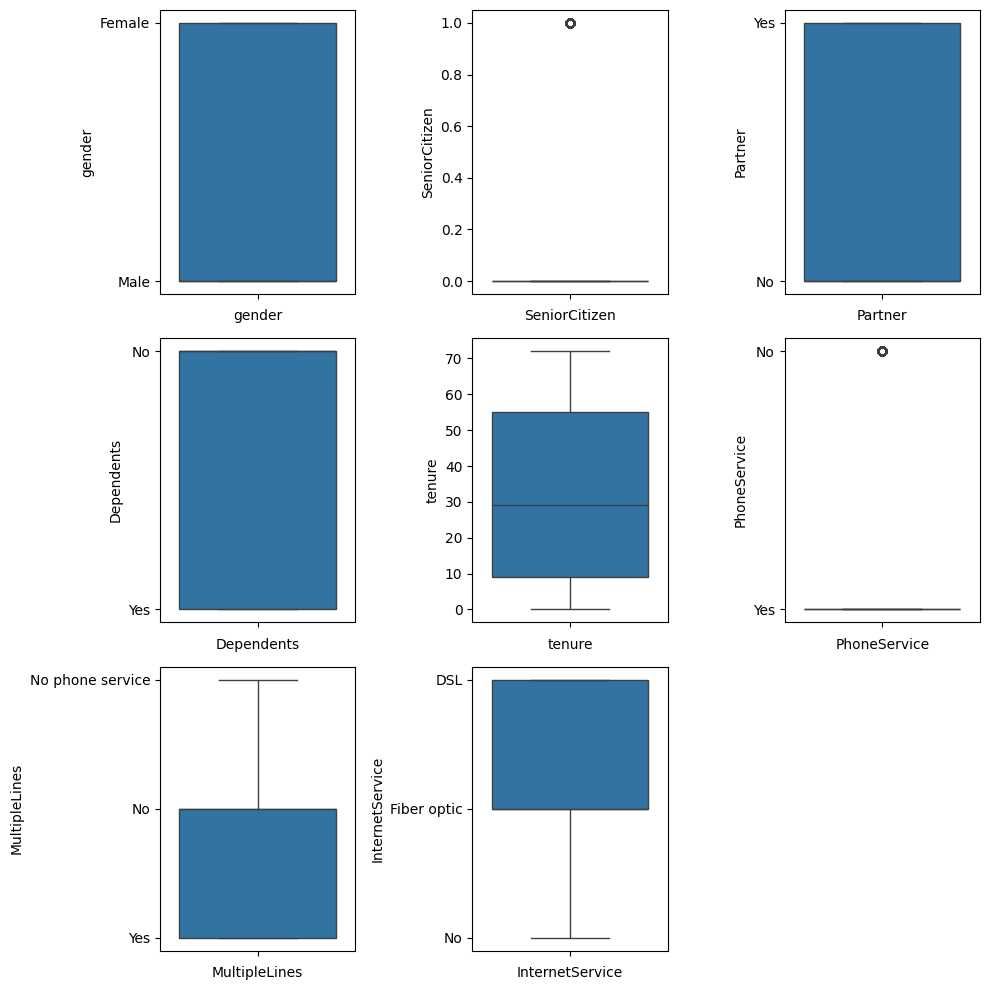

In [ ]:
plt.figure(figsize=(10,10), facecolor = 'white')
plotnumber=1
for col in df:
  if plotnumber <=8:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.yticks(rotation=0)
  plotnumber +=1

plt.tight_layout()

Senior citizen have oulier but its catogrical column so need to remove outlier

# Encoding Categorical columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
  if df[i].dtypes == 'object':
    df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [ ]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

In [ ]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


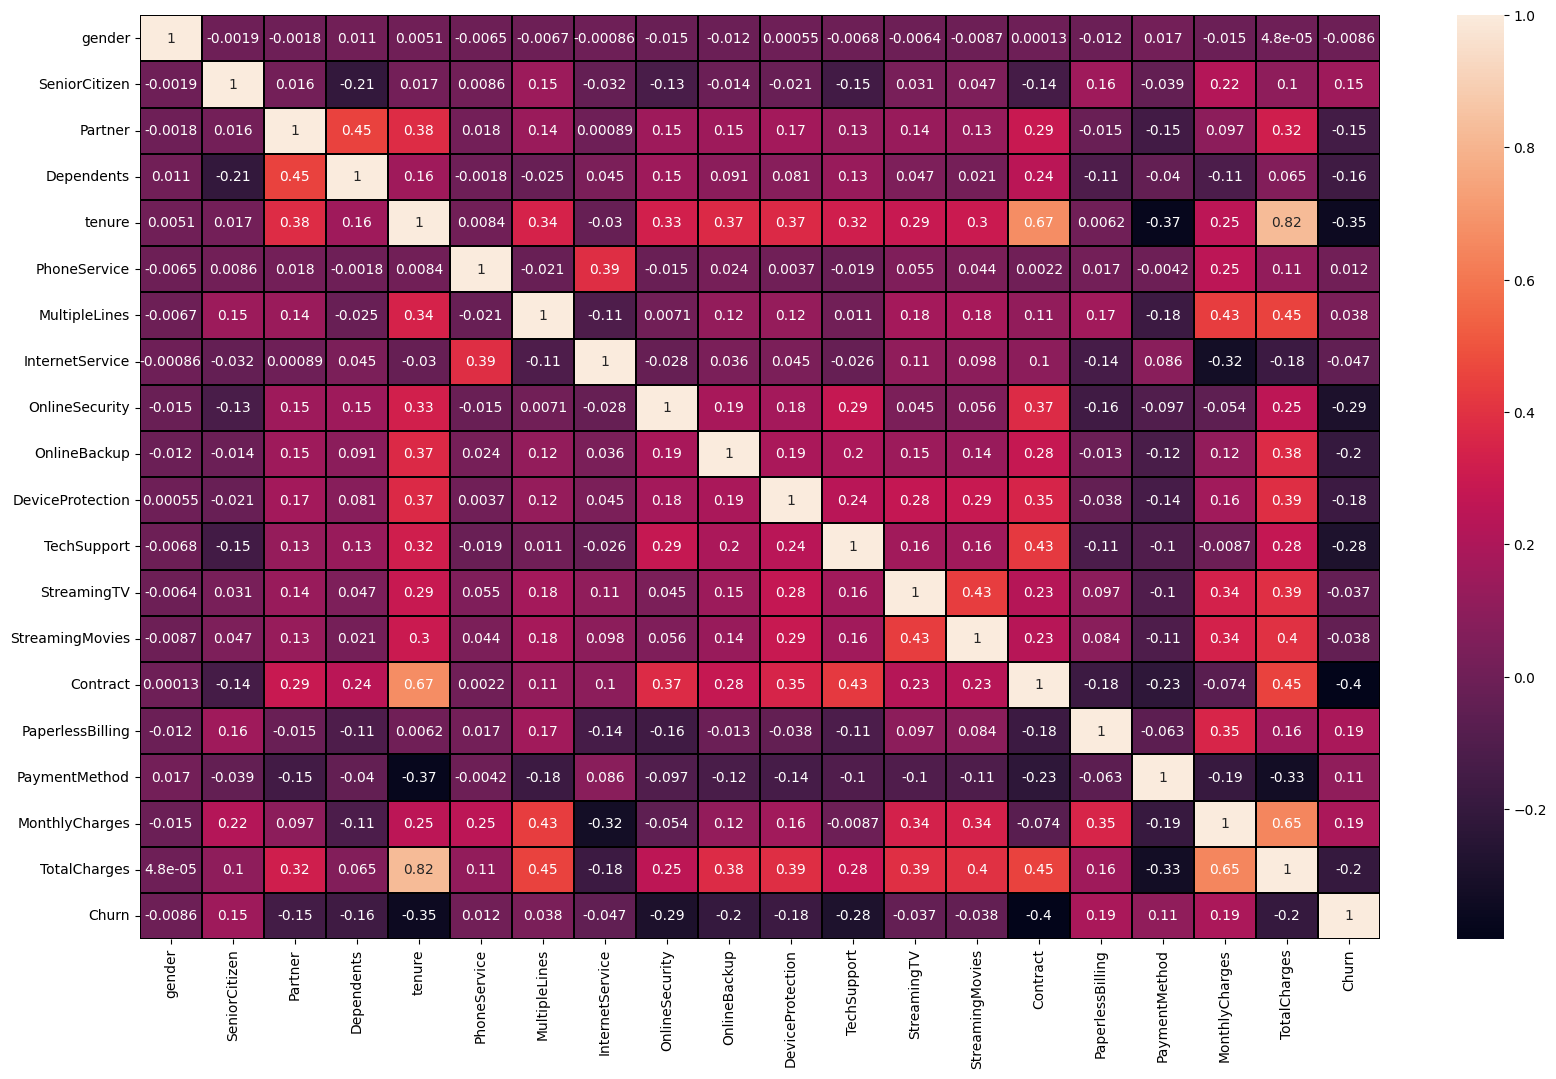

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot = True, linewidth=0.1, linecolor= "Black")
plt.show()

0 - no corelaation

-0.3 to +0.3 = less corelation

-0.5 to 0.5 = modrate corealtion

-0.7 to +0.7 = high corelation

In [ ]:
#seaprating features and lable
x = df.drop('Churn', axis=1)
y = df['Churn']

# Seaprating Features and Lable

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994971
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173876
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.960399
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.195400
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.941193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.129281
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,2.242808
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.855182
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.872777


# Feature scaling and standard scalisation

In [ ]:
#seaprating features and lable
x = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994971
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173876
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.960399
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.195400
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.941193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.129281
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,2.242808
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.855182
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.872777


### Cheacking Variance Inflation Factor(VIF)
It gives multi colinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF value'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF value,Features
0,1.001938,gender
1,1.149759,SeniorCitizen
2,1.461052,Partner
3,1.382351,Dependents
4,7.213411,tenure
5,1.622493,PhoneService
6,1.394323,MultipleLines
7,1.826632,InternetService
8,1.268868,OnlineSecurity
9,1.218713,OnlineBackup


High VIF means high colinearity with other featires so we will drop the column by checking high VIF and less correlationg with lable('Churn').

we are droping total charges column here

In [ ]:
df.drop('TotalCharges',axis=1,inplace = True )

In [ ]:
vif = pd.DataFrame()
vif['VIF value'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF value,Features
0,1.001938,gender
1,1.149759,SeniorCitizen
2,1.461052,Partner
3,1.382351,Dependents
4,7.213411,tenure
5,1.622493,PhoneService
6,1.394323,MultipleLines
7,1.826632,InternetService
8,1.268868,OnlineSecurity
9,1.218713,OnlineBackup


# Oversampling
its uses for class imbalnce issue

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
lg= LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predm=lg.predict(x_test)
print("accuracy score",lg,"is")
print(accuracy_score(y_test,predm)*100)
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score LogisticRegression() is
81.06956933270232
[[1386  153]
 [ 247  327]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1539
         1.0       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113





In [ ]:
lg=LogisticRegression()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
ABC =AdaBoostClassifier()
BC=BaggingClassifier()

model=[lg,RFC,ETC,GBC,ABC,BC]

for m in model:

  m.fit(x_train,y_train)
  m.score(x_train,y_train)
  predm=m.predict(x_test)
  print("accuracy score",m,"is")
  print(accuracy_score(y_test,predm)*100)
  print(confusion_matrix(y_test,predm))
  print(classification_report(y_test,predm))
  print('\n')

accuracy score LogisticRegression() is
81.06956933270232
[[1386  153]
 [ 247  327]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1539
         1.0       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



accuracy score RandomForestClassifier() is
79.60246095598676
[[1402  137]
 [ 294  280]]
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1539
         1.0       0.67      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.80      0.78      2113



accuracy score ExtraTreesClassifier() is
77.70941788925698
[[1375  164]
 [ 307  267]]
              precision    recall  f1-score   support

         0.0       0.82      

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

lg = LogisticRegression()
RFC = RandomForestClassifier()
ETC = ExtraTreesClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BC = BaggingClassifier()

model = [lg, RFC, ETC,ABC, BC]

for i in model:
  i.fit(x_train,y_train)
  score = cross_val_score(i, x, y)
  print(score)
  print(score.mean())

  # Make predictions on the test set
  pred = i.predict(x_test)

  # Calculate and print the difference between accuracy on test set and cross-validation mean
  print("Difference for", i, "model:", accuracy_score(y_test, pred) - score.mean())
  print('\n')


[0.80553584 0.81192335 0.78424414 0.80681818 0.80326705]
0.8023577125943608
Difference for LogisticRegression() model: 0.008337980732662342


[0.79488999 0.79418027 0.76721079 0.79332386 0.79545455]
0.7890118918962514
Difference for RandomForestClassifier() model: 0.009379021497028295


[0.79347055 0.77856636 0.75372605 0.78125    0.78551136]
0.7785048632169818
Difference for ExtraTreesClassifier() model: 0.006161487942507149


[0.81121363 0.80340667 0.79701916 0.80255682 0.80397727]
0.8036347103038907
Difference for AdaBoostClassifier() model: -0.0042972753772461125


[0.77927608 0.78424414 0.76082328 0.77201705 0.78764205]
0.7768005193883476
Difference for BaggingClassifier() model: -0.00017960126246019392




We will select model whos diffrence between cross val score and accuracy is least

In [ ]:

from sklearn.model_selection import GridSearchCV

parameter={

    'penalty':['l1', 'l2', 'elasticnet'],
    'C':[10,50,100],
    'intercept_scaling':[0,10,20],
    'n_jobs':[-2,-1,1],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

}



In [ ]:
GCV=GridSearchCV(LogisticRegression(),parameter,cv=5)

In [ ]:
GCV.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 50, 100], 'intercept_scaling': [0, 10, 20],
                         'n_jobs': [-2, -1, 1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [ ]:
GCV.best_params_

{'C': 10,
 'intercept_scaling': 10,
 'n_jobs': -2,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
Final_model = LogisticRegression(solver= 'liblinear',
 intercept_scaling = 10,
 n_jobs= -2,
 C = 10)

In [ ]:
import joblib
joblib.dump(Final_model,'Telecom_churn.pkl')

['Telecom_churn.pkl']

In [ ]:
model=joblib.load('Telecom_churn.pkl')

In [ ]:
model.fit(x_train, y_train)
predictions = model.predict(x_test)


In [ ]:
a=np.array(y_test)
df_pred=pd.DataFrame()
df_pred['predicted']= predictions
df_pred['original']=a
df_pred

,predicted,original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
2108,1.0,1.0
2109,1.0,1.0
2110,0.0,0.0
2111,1.0,0.0


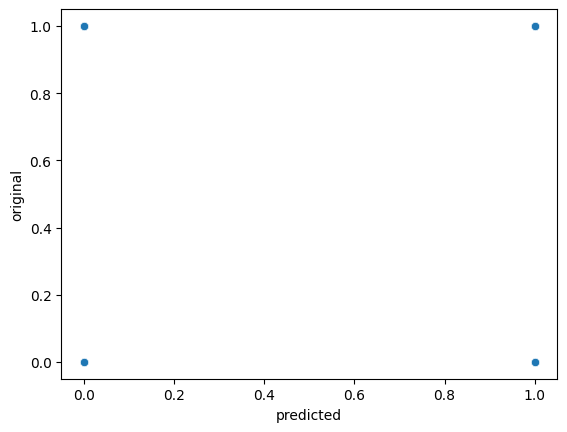

In [ ]:
sns.scatterplot(x='predicted',y = 'original',data=df_pred)
plt.show()